In [2]:
!echo "export JAVA_HOME=$(/usr/libexec/java_home)" >> ~/.bash_profile

In [3]:
!source ~/.bash_profile

In [4]:
!javac

Usage: javac <options> <source files>
where possible options include:
  @<filename>                  Read options and filenames from file
  -Akey[=value]                Options to pass to annotation processors
  --add-modules <module>(,<module>)*
        Root modules to resolve in addition to the initial modules, or all modules
        on the module path if <module> is ALL-MODULE-PATH.
  --boot-class-path <path>, -bootclasspath <path>
        Override location of bootstrap class files
  --class-path <path>, -classpath <path>, -cp <path>
        Specify where to find user class files and annotation processors
  -d <directory>               Specify where to place generated class files
  -deprecation
        Output source locations where deprecated APIs are used
  --enable-preview
        Enable preview language features. To be used in conjunction with either -source or --release.
  -encoding <encoding>         Specify character encoding used by source files
  -endorseddirs <dirs>        

In [5]:
!pip install little_mallet_wrapper

In [6]:
!pip install seaborn

In [7]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

In [8]:
!pip install little_mallet_wrapper
!pip install seaborn

In [9]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

In [10]:
#Replace filename/path
tweets_df = pd.read_csv('Desktop/Tampon_tax_Twitter/tampontax_political.csv', delimiter=",", encoding='utf-8')

In [11]:
tweets_df.head()

,index,date,username,name,verified,type,text,retweets,in_reply_to_user.username,author.public_metrics.followers_count,likes,replies,quotes,tweet_url,media,user_bio,count
0,41,2015-10-16 02:58:14,RachelA_Adler,Rachel A. Adler,False,NaN,It's time for the #government to stop fining #women for having ovaries. http://t.co/wlH3GqEZuc #...,2,NaN,2302,3,0,0,https://twitter.com/RachelA_Adler/status/6.55e+17,No Image URL,Creates Digital Buzz 🐝 | 😷 | #EconDev | #Neurodiverse | #Activist | #LGBTQIA+ Ally🌈 She/Her/Hers...,1
1,104,2015-10-16 11:47:53,jweisswolf,Jennifer Weiss-Wolf,False,NaN,https://t.co/eA1fXdizNN @Cosmopolitan joining the movement to end the #tampontax @UN_Women pleas...,0,NaN,2984,0,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1
2,43,2015-10-16 12:01:20,jweisswolf,Jennifer Weiss-Wolf,False,NaN,@GloriaSteinem @JoannaColes @DaniSMcNally @emmajune @prachigu people are talking about the #tamp...,0,GloriaSteinem,2984,1,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1
3,42,2015-10-17 17:41:03,jweisswolf,Jennifer Weiss-Wolf,False,NaN,https://t.co/eA1fXdizNN sign the @Cosmopolitan petition and end the discriminatory #tampontax #T...,0,NaN,2984,0,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1
4,103,2015-10-17 17:41:03,jweisswolf,Jennifer Weiss-Wolf,False,NaN,https://t.co/eA1fXdizNN sign the @Cosmopolitan petition and end the discriminatory #tampontax #T...,0,NaN,2984,0,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1


In [12]:
tweets_df['text'] = tweets_df['text'].astype(str)

In [13]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in tweets_df['text']]

In [14]:
original_tweets = [title for title in tweets_df['text']]

In [15]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 236
Mean Number of Words per Document: 13.5
Vocabulary Size: 910


In [16]:
num_topics = 35

In [17]:
training_data = training_data

In [18]:
#Change to your desired output directory
output_directory_path = 'Desktop/topic-model-output/Twitter/Tampon_tax_political'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [19]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                                                     output_directory_path,
                                                                     num_topics,
                                                                     training_data)

Importing data...
Complete
Training topic model...
Complete


([['co/pawmymiulg',
   'ending',
   'speaking',
   'periodosu',
   'student',
   'president',
   'anusha',
   'menstruators',
   'bringing',
   'students',
   'imagine',
   'necessary',
   'state'],
  ['funds',
   'co/dljiv',
   'bullshit',
   'lack',
   'due',
   'shut',
   'shelters',
   'services',
   'receives',
   'charity',
   'pro',
   'calling'],
  ['women',
   'change',
   'via',
   'kdqxdazck',
   'violence',
   'sponsored',
   'stop',
   'government',
   'jwemxu',
   'co/x',
   'imwithher',
   'dignityactnow',
   'income',
   'low',
   'lives',
   'overreach',
   'speakercox',
   'vahouse',
   'kimlacapria',
   'thing'],
  ['govt',
   'put',
   'money',
   'tampontax',
   'co/cznhern',
   'discrimination',
   'sre',
   'abortion',
   'oppose',
   'cash',
   'giving',
   'uqd',
   'co/h',
   'scrap',
   'want',
   'really',
   'mouth',
   'interesting',
   'play',
   'ever'],
  ['use',
   'yco',
   'xsbbx',
   'vaginatax',
   'thedivacup',
   'hits',
   'menopause',
   'under

In [20]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['co/pawmymiulg', 'ending', 'speaking', 'periodosu', 'student', 'president', 'anusha', 'menstruators', 'bringing', 'students', 'imagine', 'necessary', 'state']

✨Topic 1✨

['funds', 'co/dljiv', 'bullshit', 'lack', 'due', 'shut', 'shelters', 'services', 'receives', 'charity', 'pro', 'calling']

✨Topic 2✨

['women', 'change', 'via', 'kdqxdazck', 'violence', 'sponsored', 'stop', 'government', 'jwemxu', 'co/x', 'imwithher', 'dignityactnow', 'income', 'low', 'lives', 'overreach', 'speakercox', 'vahouse', 'kimlacapria', 'thing']

✨Topic 3✨

['govt', 'put', 'money', 'tampontax', 'co/cznhern', 'discrimination', 'sre', 'abortion', 'oppose', 'cash', 'giving', 'uqd', 'co/h', 'scrap', 'want', 'really', 'mouth', 'interesting', 'play', 'ever']

✨Topic 4✨

['use', 'yco', 'xsbbx', 'vaginatax', 'thedivacup', 'hits', 'menopause', 'underpants', 'filling', 'start', 'suppose', 'expensive', 'girl', 'sales', 'hxao', 'introduced', 'lawmakers', 'ppl', 'bills', 'official']

✨Topic 5✨

[]

✨Topic 6✨



In [21]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [22]:
tweet_dict = dict(zip(training_data, original_tweets))

In [23]:
def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

In [24]:
display_top_tweets_per_topic(topic_number=1, number_of_documents=5)

✨Topic 1✨

['funds', 'co/dljiv', 'bullshit', 'lack', 'due', 'shut', 'shelters', 'services', 'receives', 'charity', 'pro', 'calling']

0.7081 Pro-life charity receives funds from #tampontax while women's services &amp; shelters are being shut down due to lack of funds. Calling bullshit https://t.co/DlJIV13gaq

0.0001 @NYGovCuomo thank you for being a champion for #menstrualequity #tampontax

0.0001 @jillhornstein thank you for sharing #tampontax petition!!

0.0001 https://t.co/HLolyQOAIE #tampontax ... next stop is @NYGovCuomo

0.0001 @WomenintheWorld thanks for linking to @Cosmopolitan @jweisswolf #tampontax petition!!



In [25]:
display_top_tweets_per_topic(topic_number=8, number_of_documents=5)

✨Topic 8✨

['https', 'tampontax', 'tweetthereceipt', 'nygovcuomo', 'free', 'thecut', 'today', 'advocacy', 'iuqwyb', 'co/k', 'talk', 'happy', 'jweisswolf', 'pink', 'years', 'two', 'lwv', 'nbza', 'californiaforall', 'governor']

0.9582 Q3: Happy dancin' over here! 🎈What's the hold up with @NYGovCuomo Do you have any insights here @jweisswolf ? #THINXxJWW #endthetampontax

0.8813 @NMuscavage @PolHudson happy to talk re #tampontax ... I've been coordinating all the advocacy and the petition. https://t.co/K8d7IUQWyB

0.81 If you've been charged #tampontax today, please #TweetTheReceipt ... @sueonthetown @NYMag @TheCut @NYGovCuomo  https://t.co/cU8SwHjXs8

0.7733 @HollySignorelli pls feel free to contact me re your segment on #tampontax https://t.co/K8d7IUQWyB

0.5996 NY #tampontax exemption starts tmrw 9/1! #TweetTheReceipt &amp; show us your tax-free tampons! @jweisswolf @NYGovCuomo https://t.co/GwKrzbsaN0



In [26]:
display_top_tweets_per_topic(topic_number=7, number_of_documents=5)

✨Topic 7✨

['chang', 'asml', 'asmgarcia', 'bill', 'jerrybrowngov', 'https', 'tampontax', 'stand', 'co/ydjctah', 'menstrualequity', 'take', 'watching', 'world', 'sign', 'ifonlykidsrantheworld', 'pagetanrocks', 'housepagemockdebate', 'passed', 'finally', 'co/rmibttzoeu']

0.9687 https://t.co/ydjCTAh2ol @JerryBrownGov sign the #tampontax bill and stand up for #menstrualequity @AsmGarcia @AsmL2Chang

0.9687 https://t.co/ydjCTAh2ol @JerryBrownGov sign the #tampontax bill and stand up for #menstrualequity @AsmGarcia @AsmL2Chang

0.6271 Voted with #CABOE Board to support @AsmGarcia @AsmL2Chang bill AB 1561  to eliminate #tampontax - retweet to join us https://t.co/amHZRbLs16

0.5286 https://t.co/RmibttZOEu amazing work by @AsmGarcia and @AsmL2Chang ... next stop @JerryBrownGov #tampontax

0.4495 Sign the petition! https://t.co/oXlrvjL0b0 via Change The world is watching as @AsmGarcia @AsmL2Chang take on the #tampontax



In [27]:
display_top_tweets_per_topic(topic_number=14, number_of_documents=5)

✨Topic 14✨

['jenniferboysko', 'bills', 'https', 'tampontax', 'debrarodman', 'kayekory', 'markkeam', 'vahouse', 'four', 'vote', 'allowed', 'committee', 'members', 'co/ncscsvlkrd', 'governorva', 'ghhxks', 'co/tz', 'michaelleepope', 'efforts', 'quietly']

0.9848 While we certainly are thrilled by the passage of #HB83, we are disappointed that FOUR #tampontax bills died quietly in the @VaHouse without being allowed a vote. Thanks for your efforts @JenniferBoysko @KayeKory @debrarodman73 @MarkKeam @MichaelLeePope https://t.co/tZ00gHHXks

0.9768 FOUR #tampontax bills assigned to finance committee. Committee members listed below. (1/2) @JenniferBoysko @KayeKory @debrarodman73 https://t.co/Wiah1O4hRq

0.9733 #TamponTax bills by @JenniferBoysko @debrarodman73 @KayeKory not allowed a vote. Why? @TimHugo enacted fake rule. https://t.co/ejgVFS45Vd

0.9299 Republicans blocked FOUR #tampontax bills from being heard last Fri.Pls contact @VaHouse #FinanceCommitteee members &amp; demand bills be seen.

In [28]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = tweet_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))
    return

In [30]:
#display_bolded_topic_words_in_context(topic_number=1, number_of_documents=4)

In [31]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [32]:
tweets_df['topic_distributions'] = pd.Series(topic_distributions)

In [33]:
topic_distributions_df = tweets_df['topic_distributions'].apply(pd.Series)

In [34]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

In [35]:
tweets_df = pd.concat([tweets_df, topic_distributions_df], axis=1)

In [36]:
tweets_df.columns

Index(['index', 'date', 'username', 'name', 'verified', 'type', 'text',
       'retweets', 'in_reply_to_user.username',
       'author.public_metrics.followers_count', 'likes', 'replies', 'quotes',
       'tweet_url', 'media', 'user_bio', 'count', 'topic_distributions',
       'co/pawmymiulg ending speaking periodosu',
       'funds co/dljiv bullshit lack', 'women change via kdqxdazck',
       'govt put money tampontax', 'use yco xsbbx vaginatax', '',
       'action pls revise along', 'chang asml asmgarcia bill',
       'https tampontax tweetthereceipt nygovcuomo',
       'tampontax article cosmopolitan petition', 'york new signature expect',
       'vote around rule globe',
       'petition tampontax cosmopolitan danismcnally',
       'would bill products state', 'jenniferboysko bills https tampontax',
       'like used tampontax seattle', 'support vetoed jerrybrowngov discuss',
       'ohio tampons tampontax tax', 'tax tampons https sales',
       'bipartisan flgovscott year signed',

In [37]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

In [38]:
#tweets_df.rename(columns={'created_at': 'date','public_metrics.retweet_count': 'retweets', 
                          #'author.username': 'username', 
                          #'author.name': 'name',
                          #'author.verified': 'verified', 
                          #'public_metrics.like_count': 'likes', 
                          #'public_metrics.quote_count': 'quotes', 
                          #'public_metrics.reply_count': 'replies',
                           #'author.description': 'user_bio'},
                           # inplace=True)

In [39]:
tweets_df['year'] = pd.to_datetime(tweets_df['date'].dt.year, format='%Y')

In [40]:
tweets_df['year-month'] = tweets_df['date'].dt.to_period('M')

In [41]:
tweets_df['Date (by month)'] = [month.to_timestamp() for month in tweets_df['year-month']]

In [42]:
tweets_df = tweets_df.set_index('Date (by month)')

<AxesSubplot:title={'center':'Tampon Tax Political Tweets By Topic: \nYork New Signature Expect'}, xlabel='Date (by month)'>

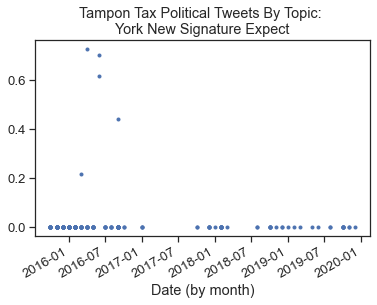

In [43]:
#change title
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

tweets_df[topic_label].plot(style='.', title=f'Tampon Tax Political Tweets By Topic: \n{topic_label.title()}')

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nHttps Tampontax Tweetthereceipt Nygovcuomo'}, xlabel='Date (by month)'>

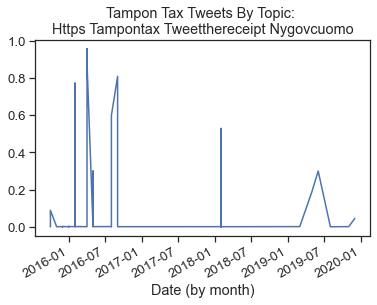

In [44]:
#change title

topic_number = 8

topic_label = " ".join(topics[topic_number][:4])

tweets_df[topic_label].plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}')

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nHttps Tampontax Tweetthereceipt Nygovcuomo'}, xlabel='Date (by month)'>

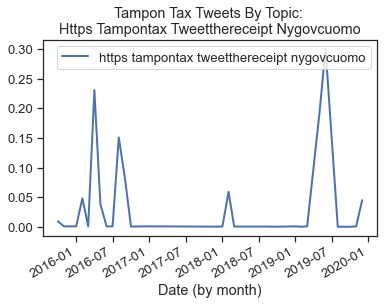

In [45]:
#change title

topic_number = 8

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nJenniferboysko Bills Https Tampontax'}, xlabel='Date (by month)'>

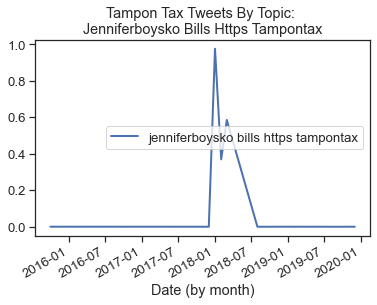

In [46]:
#change title

topic_number = 14

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nCo/Pawmymiulg Ending Speaking Periodosu'}, xlabel='Date (by month)'>

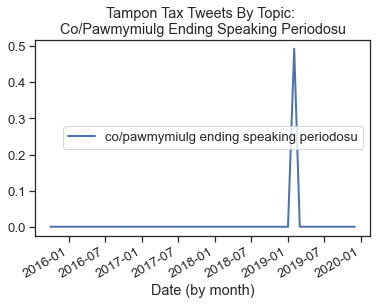

In [47]:
#change title & topic number

topic_number = 0

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

In [48]:
display_top_tweets_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['co/pawmymiulg', 'ending', 'speaking', 'periodosu', 'student', 'president', 'anusha', 'menstruators', 'bringing', 'students', 'imagine', 'necessary', 'state']

0.4932 Imagine students being responsible for bringing toilet paper with them. Why is this the case with menstruators and medically necessary products. - Anusha Singh, president of the Ohio State University student group @PERIODOSU1 speaking in support of ending the #TamponTax https://t.co/PaWmyMIulG

0.0001 @NYGovCuomo thank you for being a champion for #menstrualequity #tampontax

0.0001 @jillhornstein thank you for sharing #tampontax petition!!

0.0001 https://t.co/HLolyQOAIE #tampontax ... next stop is @NYGovCuomo

0.0001 @WomenintheWorld thanks for linking to @Cosmopolitan @jweisswolf #tampontax petition!!



<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nYork New Signature Expect'}, xlabel='Date (by month)'>

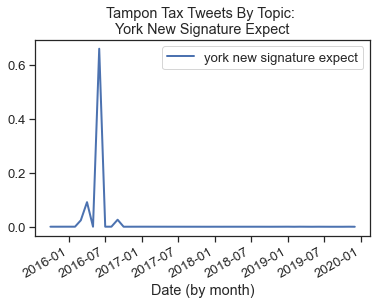

In [49]:
#change title & topic number

topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

In [50]:
tweets_text = [text for text in tweets_df['text']]
target_labels = random.sample(tweets_text, 6)

/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_pdf_ps.py:102: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/U

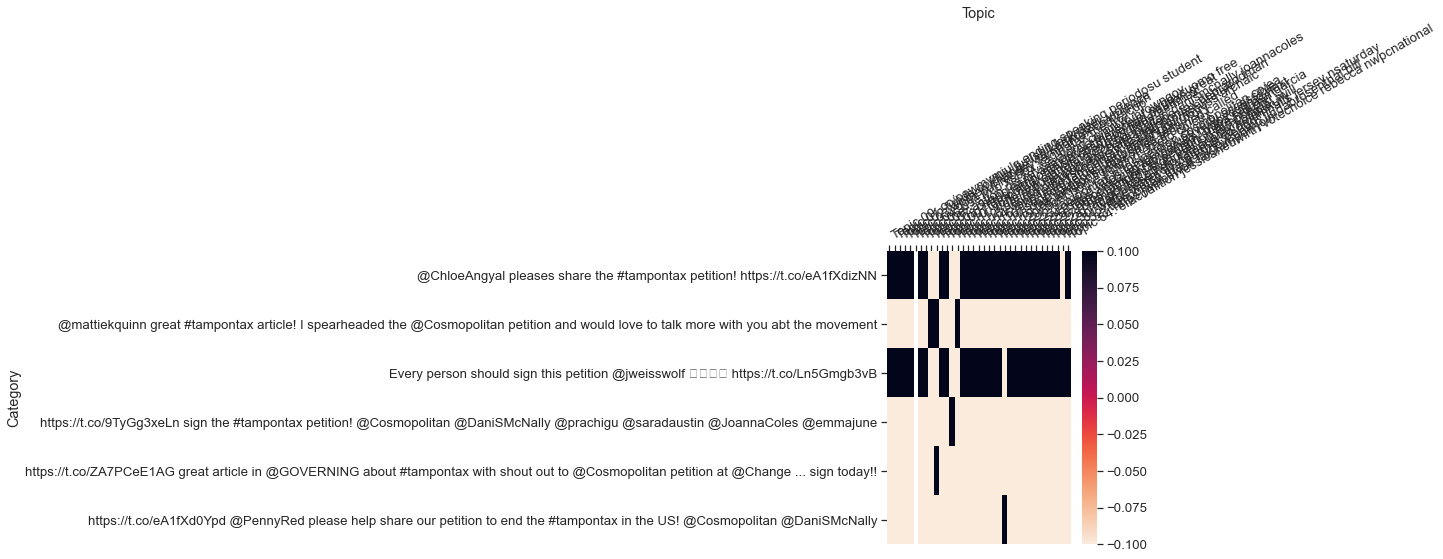

In [51]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(tweets_text,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (18, 8)
                                     )